# Homework 2: Introduction to Probability and Simulation 
***

**Name**: Sam Cuthbertson

**Section**: 001
***

This assignment is due on Moodle by **5pm on Friday September 29th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Some problems with code may be autograded.  If we provide a function API please do not change it.  If we do not provide a function API then you're free to structure your code however you like. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### [20 points] Problem 1 
***

In a box there are 99 fair coins and 1 double-headed coin.  You grab one coin at random.  

Work the following problems by hand (but don't be afraid to simulate to check your result!). 


**Part A**: You toss your coin one time.  What is the probability that you toss a Heads? 

$$
\frac{99}{100}\frac{1}{2} + \frac{1}{100}\frac{1}{1} = \frac{101}{200}
$$

**Part B**: Suppose you toss a Heads.  What is the probability that the coin you chose from the box is double-sided? 

\begin{align*}
    P(\text{double-headed | heads}) &= \frac{ P(\text{heads | double-headed}) P(\text{double-headed}) }{P(heads)} \\ 
    &= \frac{ 1 * 1/100}{101/200} \\
    \\
    &= \frac{2}{101} \approx 1.98\%
\end{align*}

**Part C**: Suppose you flip your coin $n$ times and record each outcome.  Obviously, if you flip Tails you know you picked a fair coin. But, if you flipped $n$ Heads in a row you would have a stronger belief that you in fact grabbed the double-headed coin.  What is the smallest value of $n$ Heads in a row that would make you believe that there's a better-than-half chance that the coin you grabbed is double-headed?  

\begin{align*}
    P(\text{double-headed | 2 heads}) &= \frac{ P(\text{2 heads | double-headed}) P(\text{double-headed}) }{P(\text{2 heads})} \\ 
    &= \frac{ 1 * 1/100}{103/400} \\
    \\
    &= \frac{4}{103} \approx 3.88\% \\
    &\ldots \\
    P(\text{double-headed | 6 heads}) &= \frac{ P(\text{6 heads | double-headed}) P(\text{double-headed}) }{P(\text{6 heads})} \\ 
    &= \frac{1 * 1/100}{163/6400} \\
    \\
    &= \frac{64}{163} \approx 39.26\% \\ \\
    P(\text{double-headed | 7 heads}) &= \frac{ P(\text{7 heads | double-headed}) P(\text{double-headed}) }{P(\text{7 heads})} \\ 
    &= \frac{1 * 1/100}{227/12800} \\
    \\
    &= \frac{128}{227} \approx 52.49\%
\end{align*}

### [20 points] Problem 2  
***

In soccer tournaments, [penalty shootouts](https://en.wikipedia.org/wiki/Penalty_shoot-out_(association_football) are used to determine the outcome of the game if the score is tied after regulation play.   In a penalty shootout, each team takes turns attempting 5 shots on the goal from the penalty mark that are defended only by the opposing team's goalkeeper, with the team that makes more successful kicks being declared the winner of the match.  If after 5 shots the score is still tied, the game enters _sudden death_ and the teams continue to take 1 shot each until one team scores and the other does not. 

Suppose that two teams ( Team $A$ and Team $B~$) are still tied at the end of the first round of 5 penalty shots and are entering sudden death.  Each team will now take one shot each in an attempt to win.  Suppose that the result of one shot is independent of the other shots, Team $A$ makes their shot with probability $p$, and Team $B$ makes their shot with probability $q$.  Let $W$ be the event that "Team $A$ wins the game", $E$ be the event that "the game ends after the first round of sudden death penalty shots", and $T$ be the event that "the game is still tied after the first round of sudden death penalty shots". 

**Part A**: The shootout continues until Team $A$ or Team $B$ wins.  What is the sample space $\Omega$ for this experiment?  Represent the outcomes of individual shots by $G$ for a goal and $M$ for a miss and assume that Team $A$ shoots before Team $B$.

$\textbf{One of $GMWE$, $MGE$, $MMTGMW$, $MMTMG$, $MMTMMGMW$, $MMTMMMG$, $MMTMMMMGMW$, ...}$

**Part B**: Determine $P(W \mid E)$ in terms of $p$ and $q$.

\begin{align*}
    P(W \mid E) &= P(GM) \\
        &= p(1-q)
\end{align*}

**Part C**: Explain why events $W$ and $T$ are independent. 

**In possible outcomes where $T$ is present, $W$ is present half the time. In possible outcomes without $T$, $W$ is also present half the time.**

**Part D**: Use the Law of Total Probability to show that $P(W) = p(1-q) + (2pq - p - q +1) ~P(W \mid T)$. 

** Note: As W and T are independent, $P(W\mid T) = P(W)$. Also, we can rewrite $P(W\mid E)$ as $\frac{p(1-q)}{p(1-q)+q(1-p)}$ using Baye's Theorum.**

\begin{align*}
    P(W) &= p(1-q) + (2pq-p-q+1)P(W\mid T) \\
    0 &= p(1-q) + (2pq-p-q+1)P(W) - P(W) \\
    &= P(W) + (2pq-p-q)P(W) \\
    P(W) &= \frac{p(1-q)}{-2pq+p+q} \\ \\
    &= \mathbf{\frac{p(1-q)}{p(1-q)+q(1-p)}}
\end{align*}

**Part E**: Use the fact from **Part C** that $P(W \mid T) = P(W)$ to determine $P(W)$ in terms of $p$ and $q$. 

** Using the same logic from part C, W and E must be independent. Therefor, we can state:**

$$
P(W\mid T) = P(W\mid E) = P(W) = p(1-q)
$$

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

**As the probability of winning is independent of either T or E, the probability of winning given T is the same as the probability of winning given E, which is the same as the pure probability of winning. **

**Part G**: Explain the significance of the solution technique for $P(W)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(W)$ directly?  Can we always use such techniques?  

**Using independent variables as 'filters' seems to be a useful tool, as it allows us to look at a finite number of cases instead of a potentially infinite number of cases (as we would look at trying to calculate $P(W \mid T)$. We can, in theory, always use such techniques, as long as we are correct in stating the independece of variables. If, for instance, $P(W)$ was independent of E but was dependent on T, we might have over-zelously applied this technique.**

### [25 points] Problem 3 
***

After Intro. Data Science lets out for the day, there are a bunch of different locations that Dan and Chris individually end up at.  Sometimes they go get dinner at the UMC ($~U~$) or coffee at Starbucks ($~S~$). Sometimes they go straight to their vehicles in the parking lot ($~P~$) and head home.  And sometimes they go back to their respective offices in the Engineering Center ($~E~$) or Fleming ($~F~$) to work. You can see the locations and paths that they take from Muenzinger ($~M~$) and between other locations on the linked [map](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/hmwk/hmwk02/campus_map.pdf).

Now, on a Wednesday after a particularly grueling start to the week, Dan and Chris leave class at Muenzinger in a bit of a daze and just sorta wander randomly between their usual haunts.  Their movement is governed by the following rule: when leaving a particular location, they randomly select one of the available paths to travel along (again, see the [map](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/hmwk/hmwk02/campus_map.pdf)) with equal probability. 

**Part A**: Compute (by hand) the probability that Chris ends up at the Engineering Center after first visiting one other location after leaving Muenzinger. 

\begin{align*}
    P(\text{E | M one stop ago}) &= P(E | P | M) + P(E | U | M) \\
    \\
    &= \frac{1}{2}\frac{1}{4} + \frac{1}{4}\frac{1}{4} \\
    \\
    &= \frac{3}{16}
\end{align*}

**Part B**: Compute (by hand) the probability that Dan ends up at the UMC _either_ as his first _or_ second location visited after leaving Muenzinger. 

\begin{align*}
    P(\text{U | M}) \cup P(\text{U | M one stop ago}) &= P(U | M) + P(U | S | M) + P(U | E | M) \\
    \\
    &= \frac{1}{4} + \frac{1}{2}\frac{1}{4} + \frac{1}{4}\frac{1}{4} \\
    \\
    &= \frac{7}{16}
\end{align*}

**Part C**: Suppose that Chris goes back to his office in the Engineering Center and Dan goes back to his office in Fleming.  Later that night they both leave their offices and wander around. You should assume that they take the same amount of time to go from location to location.  What is the probability that they run into each other in the same location on their second location visited? 

\begin{align*}
    P(\text{meet at second location}\mid ChE, DaF) &= P(\text{meet at S}) + P(\text{meet at M}) + P(\text{meet at U}) + P(\text{meet at E}) + P(\text{meet at P}) + P(\text{meet at F}) \\
    \\
    P(\text{meet at S}) &= P(\text{Dan at S}\mid DaF) * P(\text{Chris at S}\mid ChE) \\
                        &= P(FU)P(US) * (P(EM)P(MS) + P(EU)P(US)) \\
                        &= \frac{1}{2}\frac{1}{4} * (\frac{1}{4}\frac{1}{4} + \frac{1}{4}\frac{1}{4}) \\
                        &= \frac{1}{64} \\ \\  
    P(\text{meet at M}) &= P(\text{Dan at M}\mid DaF) * P(\text{Chris at M}\mid ChE) \\
                        &= (P(FU)P(UM) + P(FE)P(EM)) * (P(EP)P(PM) + P(EU)P(UM)) \\
                        &= (\frac{1}{2}\frac{1}{4}+\frac{1}{2}\frac{1}{4}) * (\frac{1}{4}\frac{1}{2} + \frac{1}{4}\frac{1}{4}) \\
                        &= \frac{3}{64} \\ \\
    P(\text{meet at U}) &= P(\text{Dan at U}\mid DaF) * P(\text{Chris at U}\mid ChE) \\
                        &= P(FE)P(EU) * (P(EM)P(MU) + P(EF)P(FU)) \\
                        &= \frac{1}{2}\frac{1}{4} * (\frac{1}{4}\frac{1}{4} + \frac{1}{4}\frac{1}{2}) \\
                        &= \frac{3}{128} \\ \\
    P(\text{meet at E}) &= P(\text{Dan at E}\mid DaF) * P(\text{Chris at E}\mid ChE) \\
                        &= P(FU)P(UE) * (P(EM)P(ME) + P(EF)P(FE) + P(EU)P(UE) + P(EP)P(PE)) \\
                        &= \frac{1}{2}\frac{1}{4} * (\frac{1}{4}\frac{1}{4} + \frac{1}{4}\frac{1}{2} + \frac{1}{4}\frac{1}{4} + \frac{1}{4}\frac{1}{2}) \\
                        &= \frac{3}{64} \\ \\
    P(\text{meet at P}) &= P(\text{Dan at P}\mid DaF) * P(\text{Chris at P}\mid ChE) \\
                        &= P(FE)P(EP) * P(EM)P(MP) \\
                        &= \frac{1}{2}\frac{1}{4} * \frac{1}{4}\frac{1}{4} \\
                        &= \frac{1}{128} \\ \\
    P(\text{meet at F}) &= P(\text{Dan at F}\mid DaF) * P(\text{Chris at F}\mid ChE) \\
                        &= (P(FE)P(EF)+P(FU)P(UF)) * P(EU)P(UF) \\
                        &= (\frac{1}{2}\frac{1}{4} + \frac{1}{2}\frac{1}{4}) * \frac{1}{4}\frac{1}{4} \\
                        &= \frac{1}{64} \\ \\
    P(\text{meet at second location}\mid ChE, DaF) &= P(\text{meet at S}) + P(\text{meet at M}) + P(\text{meet at U}) + P(\text{meet at E}) + P(\text{meet at P}) + P(\text{meet at F}) \\
    &= \frac{1}{64} + \frac{3}{64} + \frac{3}{128} + \frac{3}{64} + \frac{1}{128} + \frac{1}{64} \\ \\
    &= \mathbf{\frac{5}{32}}
\end{align*}

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should thoroughly explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

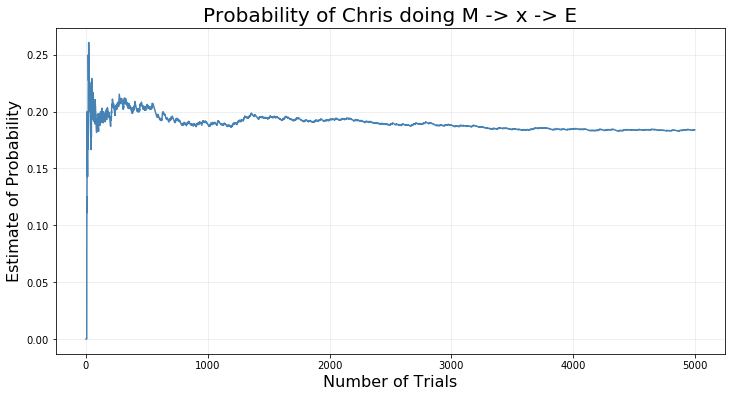

In [2]:
#Creating the map - there has to be a better way, but here we are :/
from collections import defaultdict
places = defaultdict(list)
places["S"].append("M")
places["S"].append("U")
places["U"].append("S")
places["U"].append("M")
places["U"].append("E")
places["U"].append("F")
places["M"].append("S")
places["M"].append("U")
places["M"].append("E")
places["M"].append("P")
places["E"].append("M")
places["E"].append("U")
places["E"].append("F")
places["P"].append("M")
places["P"].append("E")
places["F"].append("U")
places["F"].append("E")


#Part A
first_stop = np.random.choice(places["M"], size=5000)
second_stop = np.empty(len(first_stop), dtype="U1")
p = np.zeros(len(first_stop))

for ii in range(len(first_stop)):
    second_stop[ii] = np.random.choice(places[first_stop[ii]])

for ii in range(len(first_stop)):
    p[ii] = np.sum(second_stop[:ii+1] == "E") / len(second_stop[:ii+1])
    
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(p, color="steelblue")
ax.set_title("Probability of Chris doing M -> x -> E", fontsize=20)
ax.set_xlabel("Number of Trials", fontsize=16)
ax.set_ylabel("Estimate of Probability", fontsize=16)

ax.grid(True, alpha=0.25)

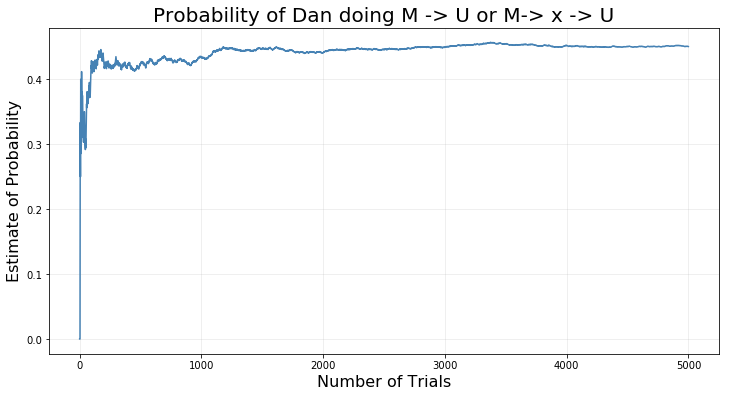

In [3]:
#Part B
first_stop = np.random.choice(places["M"], size=5000)
second_stop = np.empty(len(first_stop), dtype="U1")
p = np.zeros(len(first_stop))

for ii in range(len(first_stop)):
    second_stop[ii] = np.random.choice(places[first_stop[ii]])

for ii in range(len(first_stop)):
    p[ii] = np.sum(second_stop[:ii+1] == "U") / len(second_stop[:ii+1])
    p[ii] += np.sum(first_stop[:ii+1] == "U") / len(first_stop[:ii+1])
    
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(p, color="steelblue")
ax.set_title("Probability of Dan doing M -> U or M-> x -> U", fontsize=20)
ax.set_xlabel("Number of Trials", fontsize=16)
ax.set_ylabel("Estimate of Probability", fontsize=16)

ax.grid(True, alpha=0.25)

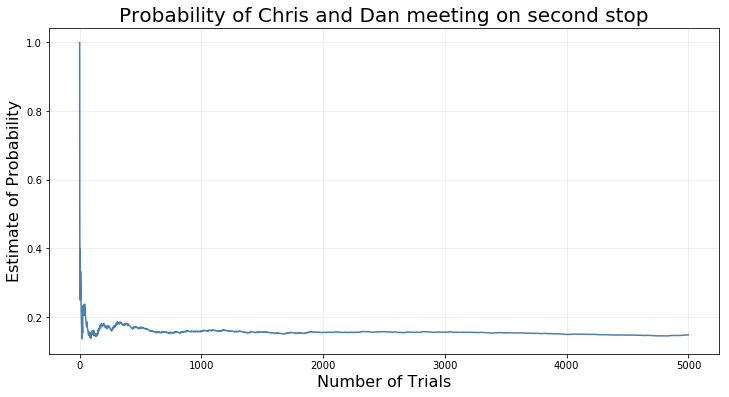

In [4]:
#Part C
sample_size = 5000
first_stop_dan = np.random.choice(places["F"], size=sample_size)
second_stop_dan = np.empty(len(first_stop_dan), dtype="U1")

first_stop_chris = np.random.choice(places["E"], size=sample_size)
second_stop_chris = np.empty(len(first_stop_chris), dtype="U1")

for ii in range(len(first_stop_dan)):
    second_stop_dan[ii] = np.random.choice(places[first_stop_dan[ii]])

for ii in range(len(first_stop_chris)):
    second_stop_chris[ii] = np.random.choice(places[first_stop_chris[ii]])
    
p = np.zeros(len(first_stop_dan))    
for ii in range(len(first_stop_dan)):
    p[ii] = np.sum(second_stop_dan[:ii+1] == second_stop_chris[:ii+1]) / len(second_stop_dan[:ii+1])
    
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(p, color="steelblue")
ax.set_title("Probability of Chris and Dan meeting on second stop", fontsize=20)
ax.set_xlabel("Number of Trials", fontsize=16)
ax.set_ylabel("Estimate of Probability", fontsize=16)

ax.grid(True, alpha=0.25)

### [20 points] Problem 4 
***

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $40$, where squares $0$ and $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50, \$100, or \$200, or pay the bank \$100 or \$150.  

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$10 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends. 

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [125]:
def miniopoly_turn(state, cash):
    cards = [50,100,200,-100,-150]
    
    roll1 = np.random.choice(range(1,7))
    roll2 = np.random.choice(range(1,7))
    
    roll = roll1 + roll2
    
    newstate = state + roll
    newcash = cash
    
    # Are we in jail?
    if(state == 30):
        if(roll1 != roll2): # Failed saving throw
            newstate = state
            newcash += -10
            if (newcash < 0): return newstate, 0
            return newstate, newcash # Turn over
        else:
            newstate = 10 + roll # Turn not over, keep executing
    
    # Did we just pass go?
    if(newstate >= 40):
        newstate += -40
        newcash += 200
    
    if(newstate == 0 or newstate == 10 or newstate == 20 or newstate == 30):
        newcash = newcash # do nothing
    elif(newstate in (2,7,17,22,33,36)):
        newcash += np.random.choice(cards)
    else:
        newcash += -newstate
    
    if (newcash < 0): return newstate, 0
    
    return newstate, newcash 

**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. 

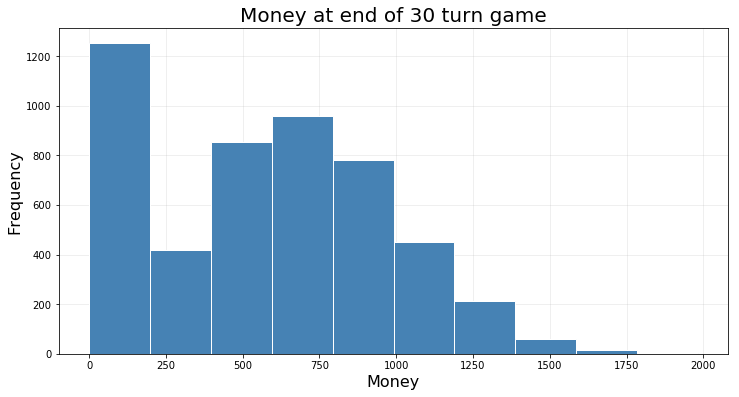

In [126]:
end_cash = np.zeros(5000)
for i in range(5000):
    cash = 200
    state = 0
    for j in range(30):
        if cash > 0:
            state, cash = miniopoly_turn(state, cash)
        else:
            cash = 0
    end_cash[i] = cash

    
fig, ax = plt.subplots(figsize=(12,6))
pd.Series(data=end_cash).hist(ax=ax, facecolor="steelblue", edgecolor="white")
ax.set_title("Money at end of 30 turn game", fontsize=20)
ax.set_xlabel("Money", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

In [127]:
#RUN PART B FIRST
bankruptPercent = (np.sum(end_cash == 0) / len(end_cash)) * 100
print("Odds of going bankrupt in 30 turns or less: {0:.2f}%".format(bankruptPercent))

Odds of going bankrupt in 30 turns or less: 22.16%


**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  

In [128]:
end_cash = np.zeros(5000)
jail = np.zeros(5000)
for i in range(5000):
    cash = 200
    state = 0
    for j in range(30):
        if cash > 0:
            state, cash = miniopoly_turn(state, cash)
            if(state == 30):
                jail[i] = 1
        else:
            cash = 0
    end_cash[i] = cash

jailBankrupt = np.sum(end_cash[jail == 1] == 0) / len(end_cash)
noJailBankrupt = np.sum(end_cash[jail == 0] == 0) / len(end_cash)
print("Odds of going bankrupt having been to jail: {0:.2f}% \t Having not been to jail: {1:.2f}%".format(jailBankrupt*100, noJailBankrupt*100))

Odds of going bankrupt having been to jail: 8.40% 	 Having not been to jail: 13.84%


**Part E**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they passed **Go** two or more times.  Is a player more or less likely to go bankrupt if they've managed to pass **Go** at least twice?

In [129]:
end_cash = np.zeros(5000)
go_passes = np.zeros(5000)
for i in range(5000):
    cash = 200
    last_cash = 0
    last_state = 0
    state = 0
    for j in range(30):
        if cash > 0:
            last_state, last_cash = state, cash
            state, cash = miniopoly_turn(state, cash)
            if((last_state != 30) and ((state + last_state) > 40) and (state < 12)):
                go_passes[i] += 1
        else:
            cash = 0
            
    end_cash[i] = cash
    
goTwiceBankrupt = np.sum(end_cash[go_passes > 1] == 0) / len(end_cash)
print("Odds of going bankrupt having been past Go twice: {0:.2f}%".format(goTwiceBankrupt*100))

Odds of going bankrupt having been past Go twice: 0.18%


### [15 points] Problem 5 
***

### Board Game Calamity! 

Dan and Chris have been playing board games for ages. Among the games they play a lot are Miniopoly and a similar game with slightly tweaked rules called **Fakeiopoly!**  Being Data-Nerds, they like to record the details of each game they play for future analysis.  Since the games are similar, they store the results for Miniopoly and Fakeiopoly in the same database.  Unfortunately, their data has been corrupted!  The only data that survived are the states (i.e. square numbers) they were on after each of the first 20 turns as well a the amount of cash they had on hand after each of the first 20 turns. This information is stored in the columns **S1**-**S20** and **C1**-**C20** in the following DataFrame. 

In [130]:
dfLog = pd.read_csv("https://raw.githubusercontent.com/chrisketelsen/csci3022/master/hmwk/hmwk02/game_log.csv")
dfLog.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,C12,C13,C14,C15,C16,C17,C18,C19,C20,Game
0,10,23,33,1,13,22,31,0,6,15,...,437,427,409,380,343,593,582,561,530,fake
1,4,8,15,21,29,38,3,9,18,25,...,595,584,684,657,622,819,805,705,673,fake
2,9,17,23,31,39,39,39,39,39,39,...,0,0,0,0,0,0,0,0,0,real
3,7,10,16,22,31,0,6,13,16,23,...,285,275,265,265,239,202,398,385,362,real
4,11,23,33,39,39,39,39,39,39,39,...,0,0,0,0,0,0,0,0,0,fake


You might notice that there is one extra column in the DataFrame called **Game** which describes whether they were playing Miniopoly (labeled real) or Fakeiopoly (labeled fake).  Unfortunately, the **Game** labels only survived in the first half of the DataFrame.  As you can see, the **Game** labels in the second half of the database were lost. 

In [131]:
dfLog.tail()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,C12,C13,C14,C15,C16,C17,C18,C19,C20,Game
995,5,13,20,22,32,38,7,15,28,0,...,443,420,393,358,558,408,392,364,326,NaN
996,8,14,18,24,32,39,6,10,14,21,...,158,119,310,292,269,240,290,484,470,NaN
997,7,14,19,23,33,1,8,15,26,38,...,497,484,465,436,486,686,586,571,545,NaN
998,5,13,22,29,38,7,16,27,37,8,...,547,520,620,817,801,778,978,1177,1164,NaN
999,8,13,23,30,30,30,22,28,34,38,...,536,513,482,682,674,660,639,613,579,NaN


While they can deal with the loss of information about later turns, doing any kind of meaningful analysis on the data requires knowledge of which game they were playing.  Your job is to see if you can reconstruct the missing **Game** labels in the second half of the DataFrame.  

Sadly, Fakeiopoly was a game of their own invention, and the rules were among the lost data.  But, being budding data scientists, you can probably glean some insights into the non-standard rules by exploring the data with intact labels in the first half of the DataFrame. 

**Part A**: Complete the function predict_game_log below to predict whether each game in the DataFrame is real or fake.  To help you, we've provided a score function that reports the accuracy of your predictions on the rows that have intact labels.  

OK, here are the **rules**: 

- You may **NOT** load any external libraries beyond Pandas, Numpy, and Matplotlib.  Instead of fancy Machine Learning techniques you may have picked up on the streets, you'll have to rely on your probability, heuristics, and exploratory data analysis skills. 
- You may write any additional functions you like, but you should **NOT** change the way that predict_game_log is called or what it returns. 

And some final **guidance**: 

- While we hope you do well, and obtain great accuracies, we're more interested in seeing how you approach the problem.  As part of your solution you should describe in detail how you based your predictions.  A solution with high accuracy and no justification of you approach may receive a low score, while a solution with mediocre accuracy and good justification may receive a high score.  What aspects of the data lead you to believe that your approach might be successful? Supporting evidence might include graphical summaries of the data and extensive description of trial and error. 

In [132]:
def score(df):
    '''
    Function to score your predictions on the labeled game data. 
    '''
    num_samples = len(df.loc[pd.notnull(df["Game"])])
    num_correct = np.sum(df.loc[pd.notnull(df["Game"]), "Game"] == df.loc[pd.notnull(df["Game"]), "Prediction"])
    print("accuracy on labeled data: {}".format(num_correct / num_samples))

**Let's start by looking at how the rules might differ in edge cases (Passing go, amount lost while in jail, states where it's legal to gain money): **

count     257.000000
mean      637.112840
std       340.379945
min         0.000000
25%       439.000000
50%       650.000000
75%       868.000000
max      1696.000000
Name: C20, dtype: float64

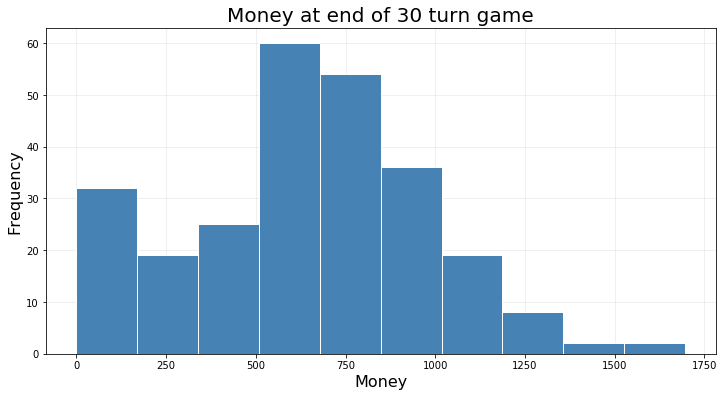

In [246]:
dfFakes = pd.read_csv("game_log.csv")
dfFakes = dfFakes.loc[dfFakes["Game"]=='fake']

fig, ax = plt.subplots(figsize=(12,6))
pd.Series(data=dfFakes.loc[:, "C20"]).hist(ax=ax, facecolor="steelblue", edgecolor="white")
ax.set_title("Money at end of 30 turn game", fontsize=20)
ax.set_xlabel("Money", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
dfFakes.loc[:, "C20"].describe()

** Looks like we end up bankrupt much less, but also have a lower average. Are we gaining money from any squares other than 2,7,17,22,33, and 36? **

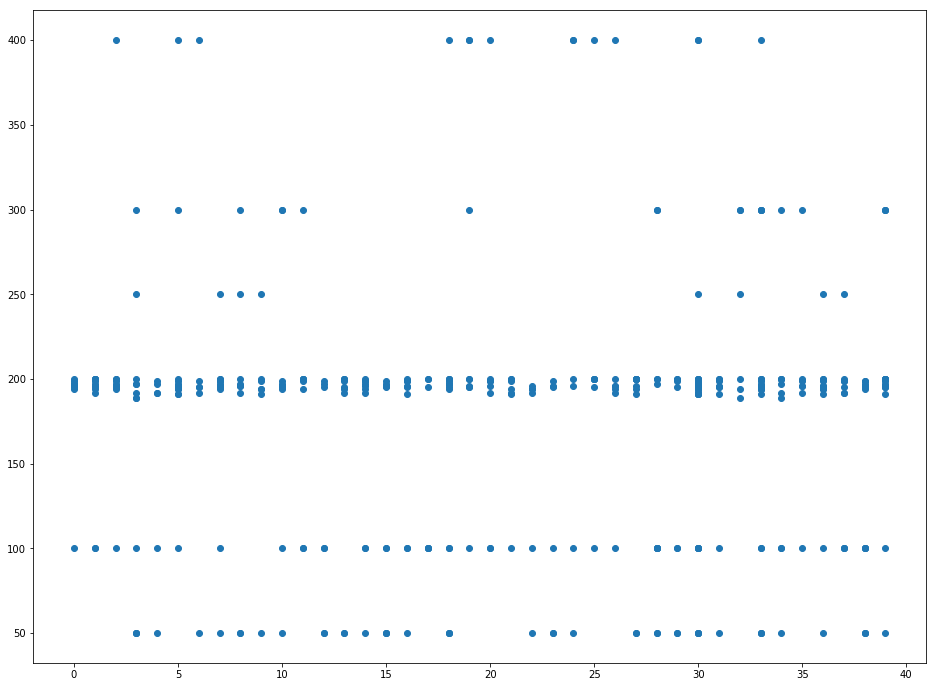

In [247]:
dfStates = dfFakes.iloc[:, 0:20]
dfDeltaCash = dfFakes.iloc[:, 20:40].diff(1,axis=1)
money_gained = []
dfDeltaCash.head()

for index, row in dfDeltaCash.iterrows():
    if (index > 200): break
    for itemdex, item in enumerate(row):
        if item > 0:
            money_gained.append((dfStates.iloc[index, itemdex], item))
    
fig, ax = plt.subplots(figsize=(16,12))
plt.scatter(*zip(*money_gained))
plt.show()

** Well it certainly looks like we're missing a whole bunch of things. Not only is money being gained on a whole host of new squares, but we're gaining new amounts (250, 300, 400) in squares where that previously wasn't possible. Additionally, we should expect a curve from states 1-11 from 200 down to 189, but instead we see that sine-esque curve above. If we predict based solely off of these observations, how is our accuracy? **

In [255]:
def predict_game_log():
    '''
    Function to read in the corrupted DataFrame and make predictions
    about which game is associated with each sequence of states 
    and cash values.  You should store your predictions ("real"/"fake")
    in the column "Prediction" in the DataFrame. 
    '''
    
    dfPredict = pd.read_csv("game_log.csv")#https://raw.githubusercontent.com/chrisketelsen/csci3022/master/hmwk/hmwk02/game_log.csv")
    
    for index, row in dfPredict.iterrows(): # For every game
        isInvalid = False
        for i in range(1, 20): # For every move (excluding the first move)
            deltacash = row[i+20] - row[i+19]
            if(deltacash > 200 and not state  == 2):
                isInvalid = True
            elif(deltacash > 0 and not state in (2,17,22,33,36,0)): # Not perfect, but obtains better accuracy
                                                                    #  than a corrected version.
                isInvalid = True
                
        if(row[39] > 0):
            isInvalid = True
        
        dfPredict.loc[dfPredict.index[index], "Prediction"] = "fake" if isInvalid else "real"
    
    return dfPredict 

In [256]:
score(predict_game_log())

accuracy on labeled data: 0.562


**Woo! A little better than just guessing fake all the time (51%).**

** A note from debugging: It looks like not all the 'real' games obey the rules of Miniopoly (see game 49, move 6, among others). This makes further analysis much more difficult (nigh on useless), so I'm going to leave this problem at the above result. **

****